In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'pandas'

In [17]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')

In [19]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [20]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [23]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [24]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [25]:
train.shape

(10886, 12)

In [26]:
test.shape

(6493, 9)

In [27]:
# 값을 datetime64로 변경 
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [28]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [29]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek
train['quarter'] = train['datetime'].dt.quarter
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [30]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,4,0,0


In [31]:
test['datetime'] = pd.to_datetime(test['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [32]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek
test['quarter'] = test['datetime'].dt.quarter
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [33]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,quarter,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,1,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,1,4,0,0


In [34]:
# 월별 온도의 평균구하기 
pd.DataFrame(train.groupby('month')['temp'].mean())

,temp
month,
1,9.840000
2,11.798535
3,15.902175
4,18.718372
5,22.674079
6,27.064496
7,30.841711
8,29.736689
9,25.779032


<AxesSubplot:xlabel='month'>

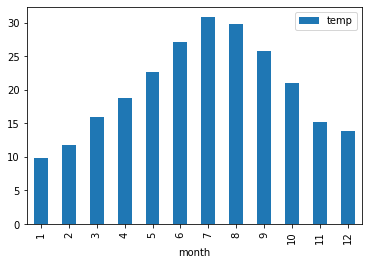

In [35]:
pd.DataFrame(train.groupby('month')['temp'].mean()).plot(kind='bar')

<AxesSubplot:xlabel='month', ylabel='temp'>

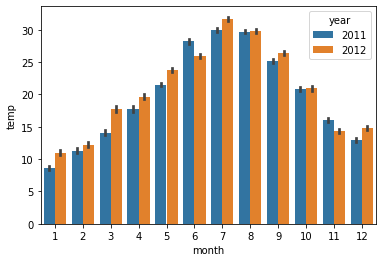

In [36]:
# x축은 월 y축은 기온 hue는 년도 
sns.barplot(x='month', y='temp', hue = 'year',data= train)

<AxesSubplot:xlabel='month', ylabel='count'>

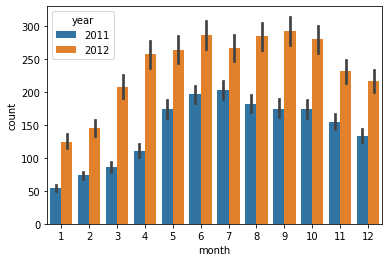

In [37]:
sns.barplot(x='month', y = 'count', hue = 'year', data=train)

In [38]:
train['windspeed'].value_counts(sort = False)

0.0000     1313
6.0032      872
16.9979     824
19.0012     676
19.9995     492
12.9980    1042
15.0013     961
8.9981     1120
11.0014    1057
22.0028     372
30.0026     111
23.9994     274
27.9993     187
26.0027     235
7.0015     1034
32.9975      80
36.9974      22
31.0009      89
35.0008      58
39.0007      27
43.9989       8
40.9973      11
51.9987       1
46.0022       3
50.0021       1
43.0006      12
56.9969       2
47.9988       2
Name: windspeed, dtype: int64

In [39]:
train['minute'].value_counts()

0    10886
Name: minute, dtype: int64

In [40]:
train['second'].value_counts()

0    10886
Name: second, dtype: int64

In [41]:
train = train.drop(['minute','second'],axis=1)
test = test.drop(['minute','second'],axis=1)

train.head( )

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,4


In [42]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,quarter,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,1


In [43]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [44]:
# daofweek의 value 가 5,6이면 1 아니면 0 
train['weekend'] = train['dayofweek'].apply(lambda x:int(x in [5,6]))
train['weekend'].value_counts()

0    7723
1    3163
Name: weekend, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

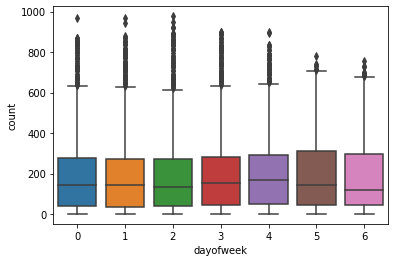

In [45]:
# 이상치 찾는 박스플롯 생성 
sns.boxplot(x = 'dayofweek', y = 'count', data = train)

<AxesSubplot:xlabel='hour', ylabel='registered'>

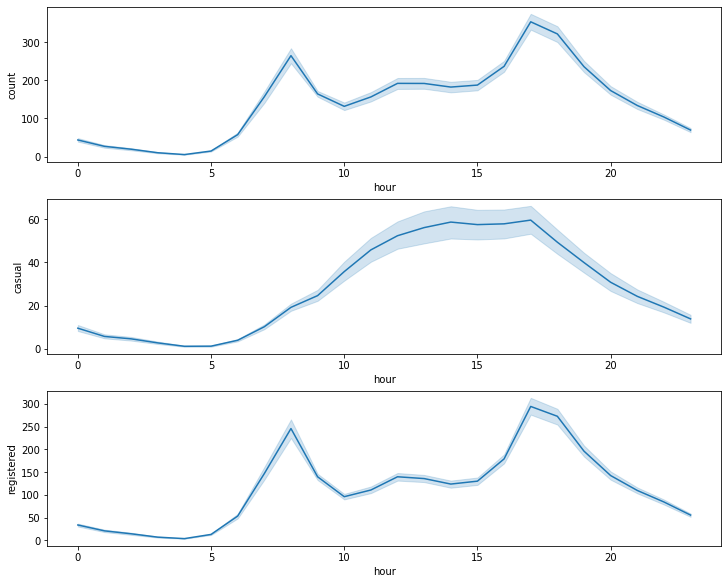

In [46]:
fig , axes = plt.subplots(3,1, constrained_layout = True) # constrained = 겹치지 않게 자리좀 띄워줘
fig.set_size_inches(10,8)

sns.lineplot(x='hour', y='count',  data = train.loc[train['year']==2011], ax = axes[0])
sns.lineplot(x='hour', y='casual', data= train.loc[train['year']==2011], ax=axes[1])
sns.lineplot(x='hour', y='registered', data= train.loc[train['year']==2011],ax=axes[2])

<AxesSubplot:xlabel='hour', ylabel='count'>

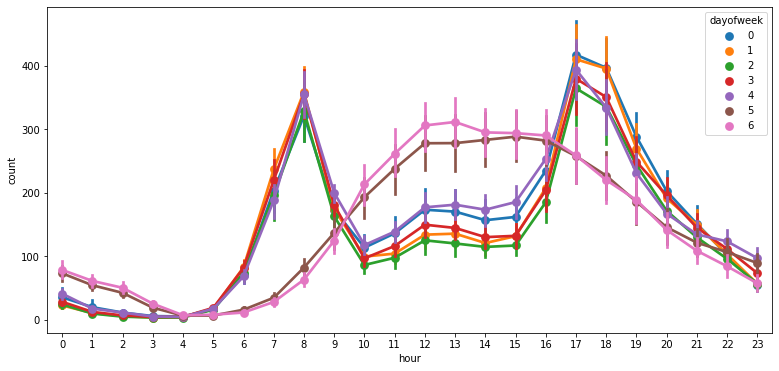

In [47]:
plt.figure(figsize = (13,6))
sns.pointplot(x = 'hour', y='count', hue='dayofweek', data = train.loc[train['year']==2011])

<AxesSubplot:xlabel='hour', ylabel='count'>

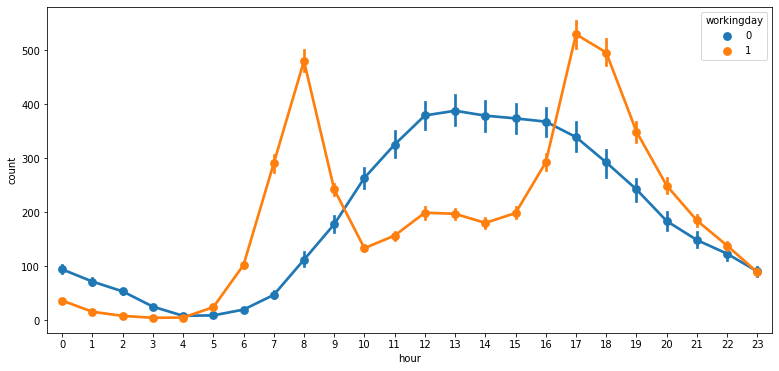

In [43]:
plt.figure(figsize = (13,6))
sns.pointplot(x = 'hour', y='count', hue='workingday', data = train)

<AxesSubplot:xlabel='hour', ylabel='count'>

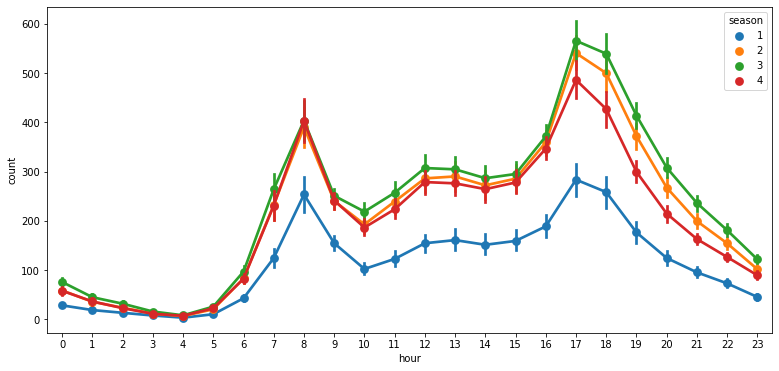

In [44]:
plt.figure(figsize = (13,6))
sns.pointplot(x = 'hour', y='count', hue='season', data = train)

<AxesSubplot:xlabel='humidity', ylabel='count'>

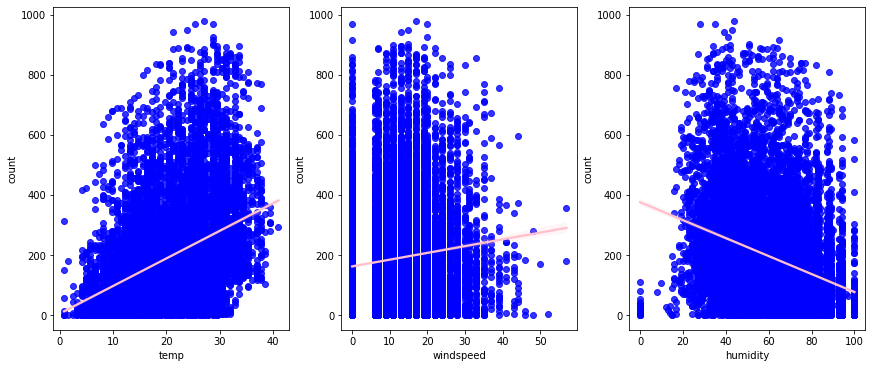

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, constrained_layout = True)
fig.set_size_inches(12, 5)
# line_kws, scatter_kws 두개의 색 구분짓게 해줌
sns.regplot(x = 'temp', y = 'count', data=train, ax = ax1,line_kws={'color':'pink'}, scatter_kws={'color':'blue'})
sns.regplot(x = 'windspeed', y = 'count', data=train, ax = ax2,line_kws={'color':'pink'}, scatter_kws={'color':'blue'})
sns.regplot(x = 'humidity', y = 'count', data=train, ax = ax3,line_kws={'color':'pink'}, scatter_kws={'color':'blue'})

In [51]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

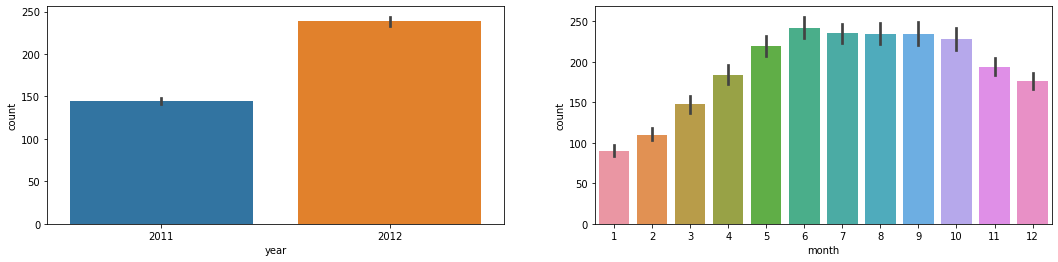

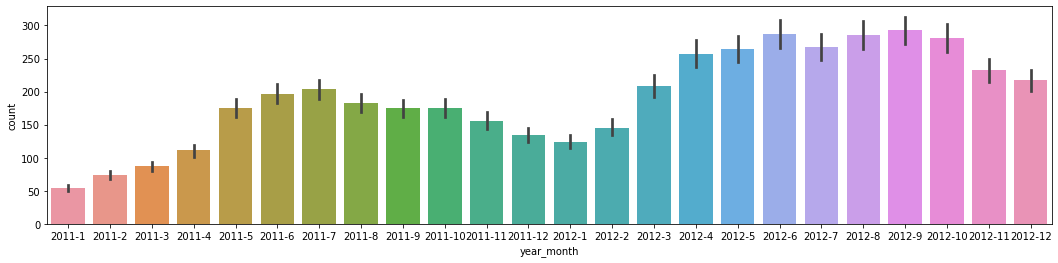

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year', y='count', ax= ax1)
sns.barplot(data=train, x = 'month', y='count',  ax=ax2)

fig, ax3 = plt.subplots(nrows =1, ncols = 1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x= 'year_month', y='count', ax=ax3)

In [53]:
category_feature = ['season','holiday','workingday','weather',
                    'dayofweek','month','year','hour']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  dayofweek   10886 non-null  int64         
 16  quarter     10886 non-

In [54]:
for var in category_feature:
    # 카테고리 피처로 설정한 컬럼들의 밸류 타입을 카테고리로 변경
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  int64         
 15  dayofweek   10886 non-null  category      
 16  quarter     10886 non-

In [56]:
feature_selected = {'season', 'weather', 'humidity', 'windspeed',
                   'year','hour','dayofweek','holiday','workingday'}

In [74]:
x_train = train[feature_selected]
x_train.head()

,workingday,humidity,season,windspeed,hour,weather,year,holiday,dayofweek
0,0,81,1,0.0,0,1,2011,0,5
1,0,80,1,0.0,1,1,2011,0,5
2,0,80,1,0.0,2,1,2011,0,5
3,0,75,1,0.0,3,1,2011,0,5
4,0,75,1,0.0,4,1,2011,0,5


In [75]:
x_test = test[feature_selected]
x_test.head()

,workingday,humidity,season,windspeed,hour,weather,year,holiday,dayofweek
0,1,56,1,26.0027,0,1,2011,0,3
1,1,56,1,0.0000,1,1,2011,0,3
2,1,56,1,0.0000,2,1,2011,0,3
3,1,56,1,11.0014,3,1,2011,0,3
4,1,56,1,11.0014,4,1,2011,0,3


In [81]:
from sklearn.metrics import make_scorer

def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log(y_pred+1)-np.log(y_true+1),2)))

rmsle_scorer = make_scorer(rmsle)

In [82]:
label_name = 'count'

y_train = train[label_name]
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

model = RandomForestRegressor(n_estimators = 20, random_state = 123)

k_fold = KFold(n_splits = 5, shuffle = True , random_state = 123)

score = cross_val_score(model, x_train, y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()

print("Score ={0:.5f}".format(score))

Score =0.38244


In [84]:
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=123)

In [86]:
pred = model.predict(x_test)
pred[0:10]

array([ 14.8 ,   6.4 ,   6.9 ,   2.9 ,   2.6 ,   5.15,  41.5 , 104.7 ,
       249.6 , 145.6 ])

In [87]:
submission = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [88]:
submission['count'] = pred
submission

,datetime,count
0,2011-01-20 00:00:00,14.80
1,2011-01-20 01:00:00,6.40
2,2011-01-20 02:00:00,6.90
3,2011-01-20 03:00:00,2.90
4,2011-01-20 04:00:00,2.60
...,...,...
6488,2012-12-31 19:00:00,307.20
6489,2012-12-31 20:00:00,260.45
6490,2012-12-31 21:00:00,152.50
6491,2012-12-31 22:00:00,132.75


In [91]:
submission.to_csv('Bike_submission0117.csv', index=False)